## Assignment 9

Use the Europe_Covid.txt file from the DATA 690 Data Files

Exercise 1.
 Compute the Jaccard similarity index

• Load ‘word_tokenize’ and ‘WordNetLemmatizer’ from nltk, among
other libraries

• Use these pairs for comparison:
o pair1 = ["What you do defines you","Your deeds define you"]
o pair2 = ["Once upon a time there lived a king.", "Who is your
queen?"]
o pair3 = ["He is desperate", "Is he not desperate?"]
• What is the Jaccard similarity index between pair1[0] and pair1[1]?

Exercise 2.
 Compute the Levenshtein distance between "I cannot believe
what he said" and "I believe it is not what he said". What does the result
mean?

Exercise 3.
Compute the most similar words to 'government' and 'curfew'
based on the text.

Exercise 4.
 What is the sentiment and subjectivity of the Europe_Covid
text?

Exercise 5.
WordCloud
• What are the most frequently used words in the Europe_Covid text?

Exercise 6.
 Summarize the text in 5 sentences using extractive
summarization.

Exercise 7. Use a zero-shot transformer to determine the following
categories: informational, query, advocacy, not informational.

In [22]:
# Import the Necessary NLP Libraries
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import math

In [2]:
text = """European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began. The case tally was more than 50% higher than Monday's 7,482 cases. "The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday. The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October. French President Emmanuel Macron warned Friday that his country needs to live with the virus in the longterm. "When I listen to the scientists, and the Scientific Council, we foresee [living with the virus] at best until next summer," Macron said, speaking during a visit to a health center. Macron added that his government aims to impose new coronavirus restrictions in a targeted way. On the same day France reported 42,032 new cases in 24 hours, a new record, according to the French Health Agency. Around 46 million people in the country are subject to a night-time coronavirus curfew in France. The picture in neighboring Spain is less dramatic but the country's daily average remains high, remaining at 299 per million on October 19. Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday. "The next few weeks, months will be tough, very tough," Sanchez said, adding that while Spain has officially recorded more than 1 million cases, he estimates the real number is more than 3 million. The Spanish regions of Castilla and Leon and Valencia have announced they are planning to impose a night curfew over the coming days. The region of Andalusia has also requested a curfew for the city of Granada."""


### Excersice 1


In [3]:

pair1 = ["What you do defines you","Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]


In [4]:
# Function to compute Jaccard similarity
# Finding intersection and union
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# Tokenize sentences
tokenized_pair1 = [set(word_tokenize(s)) for s in pair1]
# Print similarity score
print(jaccard_similarity(tokenized_pair1[0], tokenized_pair1[1]))

0.14285714285714285


###  Exercise 2

### Caluclating string Distance

In [7]:
from nltk.metrics import edit_distance
# Define strings
s1 = "I cannot believe what he said"
s2 = "I believe it is not what he said"

# Computing Levenshtein distance
distance = edit_distance(s1, s2)
print(distance)

# The Levenshtein distance is 15. This means the minimum number of edits (insertions, deletions, or substitutions)
# required to transform s1 into s2 is 15. The higher the number, the more different the two strings are.


15


### Exercise 3

### Find similar words

In [8]:
import nltk
nltk.download('wordnet')
# Lemmatizing words
lemmatizer = WordNetLemmatizer()
text_tokens = word_tokenize(text)
lemmas = [lemmatizer.lemmatize(w) for w in text_tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
from collections import Counter
lemma_counts = Counter(lemmas)

similar_to_government = wordnet.synsets("government")[0].similar_tos()
similar_to_curfew = wordnet.synsets("curfew")[0].similar_tos()

In [10]:
#  Print similar words
print(similar_to_government)
print(similar_to_curfew)

[]
[]


### Excersice 4

In [11]:

from textblob import TextBlob

# Creating a text blob
blob = TextBlob(text)
# Print sentiment
print(blob.sentiment)

Sentiment(polarity=0.04992382294707877, subjectivity=0.3476432095036746)


### The sentiment of the Europe_Covid text is Sentiment(polarity=0.049, subjectivity=0.34)
#### The polarity is negative indicating an overall positive tone.
#### The subjectivity score is low, so the text is more objective.

### Exercise 5

### Generate word cloud

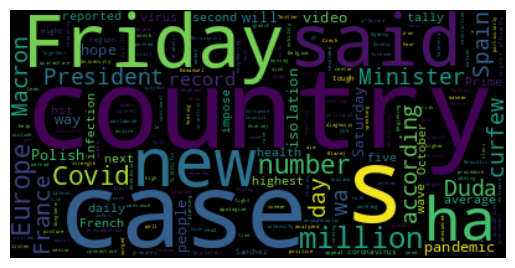

[(',', 29), ('the', 27), ('.', 23), ('to', 18), ('a', 15), ('of', 12), ('in', 12), ('The', 8), ('country', 7), ('case', 6)]


In [23]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word cloud
text_for_cloud = " ".join([w for w in lemmas])
wordcloud = WordCloud().generate(text_for_cloud)

# Display cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(lemma_counts.most_common(10))

### Exercise 6

### Summarization

In [13]:
# Tokenize sentences
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)

In [14]:
import heapq
import numpy as np


In [15]:
def compute_scores(sentences, threshold):
    word_freqs = lemma_counts
    scores = []
    for sentence in sentences:
        word_count_in_sentence =(len(word_tokenize(sentence)))
        word_count = sum([word_freqs[w] for w in word_tokenize(sentence) if w in word_freqs])
        scores.append(((word_count_in_sentence) / (word_count+1)) * 1.0)
    return scores

In [16]:
scores = compute_scores(sentences, 1.3)

In [17]:
ranked_sentence_indexes = []
for i in range(5):
    ranked_sentence_indexes.append(np.argmax(scores))
    scores[ranked_sentence_indexes[-1]] = 0


In [18]:
summary_sentences = [sentences[j] for j in ranked_sentence_indexes]
summary = ". ".join(summary_sentences)
print(summary)

# The summary captures the key information about high infection rates and record cases in Europe.


The case tally was more than 50% higher than Monday's 7,482 cases.. I hope it will stay this way.. European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.. Duda said that he was feeling well, was asymptomatic and would continue working in isolation.. The picture in neighboring Spain is less dramatic but the country's daily average remains high, remaining at 299 per million on October 19.


### Exercise 7

In [19]:
# Import Necessary NLP Libraries for Text classification
import numpy as np
import tensorflow as tf
from transformers import pipeline

In [20]:


classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli")
results = classifier(["informational", "query", "advocacy", "not informational"], text)



config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


[{'sequence': 'informational', 'labels': ['the Netherlands', 'and the Scientific Council', '" Sanchez said', '" Macron said', 'the number of new infections has surged since the beginning of October. French President Emmanuel Macron warned Friday that his country needs to live with the virus in the longterm. "When I listen to the scientists', 'I am full of strength. I hope it will stay this way. However', 'Switzerland and France.In all five countries', "according to the French Health Agency. Around 46 million people in the country are subject to a night-time coronavirus curfew in France. The picture in neighboring Spain is less dramatic but the country's daily average remains high", 'very tough', 'Belgium', "according to Johns Hopkins University's latest moving averages", '" Prime Minister Mateusz Morawiecki said Friday. The five countries with the highest rate of infection worldwide are all in Europe', 'according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda sa

In [21]:
print(results)
# Printing top predicted label

[{'sequence': 'informational', 'labels': ['the Netherlands', 'and the Scientific Council', '" Sanchez said', '" Macron said', 'the number of new infections has surged since the beginning of October. French President Emmanuel Macron warned Friday that his country needs to live with the virus in the longterm. "When I listen to the scientists', 'I am full of strength. I hope it will stay this way. However', 'Switzerland and France.In all five countries', "according to the French Health Agency. Around 46 million people in the country are subject to a night-time coronavirus curfew in France. The picture in neighboring Spain is less dramatic but the country's daily average remains high", 'very tough', 'Belgium', "according to Johns Hopkins University's latest moving averages", '" Prime Minister Mateusz Morawiecki said Friday. The five countries with the highest rate of infection worldwide are all in Europe', 'according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda sa